In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
!git clone https://github.com/time-series-foundation-models/lag-llama/ 

fatal: destination path 'lag-llama' already exists and is not an empty directory.


In [4]:
cd lag-llama 

/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/test/test_lag_llama/lag-llama


/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/lag_llama_venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
pip install -r requirements.txt --quiet 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
!huggingface-cli download time-series-foundation-models/Lag-Llama lag-llama.ckpt --local-dir weights/

weights/lag-llama.ckpt


In [7]:
pip install yfinance --quiet


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

df_etth2 = pd.read_csv('ETTh2.csv')

In [9]:
df_etth2.drop(columns=['HULL', 'MULL', 'LUFL', 'LULL'], inplace=True)

In [13]:
df_etth2['date'] = pd.to_datetime(df_etth2['date'])

In [22]:
df_etth2

,date,HUFL,MUFL,OT
0,2016-07-01 00:00:00,41.130001,36.535999,38.661999
1,2016-07-01 01:00:00,37.528000,33.936001,37.124001
2,2016-07-01 02:00:00,37.946999,35.330002,36.465000
3,2016-07-01 03:00:00,38.952000,35.543999,33.608501
4,2016-07-01 04:00:00,38.113998,35.410000,31.850500
...,...,...,...,...
17415,2018-06-26 15:00:00,39.202999,49.644001,47.084999
17416,2018-06-26 16:00:00,38.113998,48.759998,48.183498
17417,2018-06-26 17:00:00,39.622002,50.609001,48.183498
17418,2018-06-26 18:00:00,43.643002,54.737000,46.865501


In [205]:
df_etth2.loc[8663, 'date']

Timestamp('2017-06-26 23:00:00')

In [260]:
CONTEXT_WINDOW = 480
target_date = pd.Timestamp('2017-06-27 00:00:00')
# target_date = pd.Timestamp('2017-06-29 00:00:00')
# target_date = pd.Timestamp('2017-07-04 00:00:00')
start_idx = df_etth2[df_etth2['date'] < target_date].index[-1]

current_idx = start_idx + 0
context_start = current_idx - CONTEXT_WINDOW
context_end = current_idx

df_etth2['OT'].iloc[context_start:context_end + 1]

8183    28.555000
8184    28.115000
8185    27.895500
8186    27.676001
8187    27.236000
          ...    
8659    38.442501
8660    37.563499
8661    36.465000
8662    36.025002
8663    35.805500
Name: OT, Length: 481, dtype: float64

In [225]:
foo_df = df_etth2['OT'].iloc[context_start + 1:context_end + 1]
len(foo_df)

480

In [221]:
context_start_date = df_etth2['date'].iloc[context_start]
context_start_date

Timestamp('2017-06-06 23:00:00')

In [216]:
target_date = pd.Timestamp('2017-06-26 23:00:00')

df_etth2[df_etth2['date'] == target_date]

,date,HUFL,MUFL,OT
8663,2017-06-26 23:00:00,30.993999,38.386002,35.8055


# ETT-H2 Diagram 1

Start index: 8663

Forecast Setup Details:
Total data length: 17420
Start index (last point in context window): 8663
Context window size: 478

Step 1 / 25
  Context indices = [8185, 8663]
  Forecast index  = 8663
  Context date range = 2017-06-07 01:00:00 to 2017-06-26 23:00:00
  Forecast date       = 2017-06-27 00:00:00
478
2017-06-07 01:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 35.58, Actual = 35.37

Step 2 / 25
  Context indices = [8186, 8664]
  Forecast index  = 8664
  Context date range = 2017-06-07 02:00:00 to 2017-06-27 00:00:00
  Forecast date       = 2017-06-27 01:00:00
478
2017-06-07 02:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 35.67, Actual = 34.93

Step 3 / 25
  Context indices = [8187, 8665]
  Forecast index  = 8665
  Context date range = 2017-06-07 03:00:00 to 2017-06-27 01:00:00
  Forecast date       = 2017-06-27 02:00:00
478
2017-06-07 03:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 35.43, Actual = 34.49

Step 4 / 25
  Context indices = [8188, 8666]
  Forecast index  = 8666
  Context date range = 2017-06-07 04:00:00 to 2017-06-27 02:00:00
  Forecast date       = 2017-06-27 03:00:00
478
2017-06-07 04:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 34.84, Actual = 34.05

Step 5 / 25
  Context indices = [8189, 8667]
  Forecast index  = 8667
  Context date range = 2017-06-07 05:00:00 to 2017-06-27 03:00:00
  Forecast date       = 2017-06-27 04:00:00
478
2017-06-07 05:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 34.46, Actual = 33.83

Step 6 / 25
  Context indices = [8190, 8668]
  Forecast index  = 8668
  Context date range = 2017-06-07 06:00:00 to 2017-06-27 04:00:00
  Forecast date       = 2017-06-27 05:00:00
478
2017-06-07 06:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 34.15, Actual = 33.39

Step 7 / 25
  Context indices = [8191, 8669]
  Forecast index  = 8669
  Context date range = 2017-06-07 07:00:00 to 2017-06-27 05:00:00
  Forecast date       = 2017-06-27 06:00:00
478
2017-06-07 07:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 33.81, Actual = 33.39

Step 8 / 25
  Context indices = [8192, 8670]
  Forecast index  = 8670
  Context date range = 2017-06-07 08:00:00 to 2017-06-27 06:00:00
  Forecast date       = 2017-06-27 07:00:00
478
2017-06-07 08:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 33.66, Actual = 33.39

Step 9 / 25
  Context indices = [8193, 8671]
  Forecast index  = 8671
  Context date range = 2017-06-07 09:00:00 to 2017-06-27 07:00:00
  Forecast date       = 2017-06-27 08:00:00
478
2017-06-07 09:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 33.51, Actual = 34.49

Step 10 / 25
  Context indices = [8194, 8672]
  Forecast index  = 8672
  Context date range = 2017-06-07 10:00:00 to 2017-06-27 08:00:00
  Forecast date       = 2017-06-27 09:00:00
478
2017-06-07 10:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 33.79, Actual = 35.59

Step 11 / 25
  Context indices = [8195, 8673]
  Forecast index  = 8673
  Context date range = 2017-06-07 11:00:00 to 2017-06-27 09:00:00
  Forecast date       = 2017-06-27 10:00:00
478
2017-06-07 11:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 34.53, Actual = 37.56

Step 12 / 25
  Context indices = [8196, 8674]
  Forecast index  = 8674
  Context date range = 2017-06-07 12:00:00 to 2017-06-27 10:00:00
  Forecast date       = 2017-06-27 11:00:00
478
2017-06-07 12:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 35.45, Actual = 40.86

Step 13 / 25
  Context indices = [8197, 8675]
  Forecast index  = 8675
  Context date range = 2017-06-07 13:00:00 to 2017-06-27 11:00:00
  Forecast date       = 2017-06-27 12:00:00
478
2017-06-07 13:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 37.19, Actual = 42.40

Step 14 / 25
  Context indices = [8198, 8676]
  Forecast index  = 8676
  Context date range = 2017-06-07 14:00:00 to 2017-06-27 12:00:00
  Forecast date       = 2017-06-27 13:00:00
478
2017-06-07 14:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 40.14, Actual = 44.59

Step 15 / 25
  Context indices = [8199, 8677]
  Forecast index  = 8677
  Context date range = 2017-06-07 15:00:00 to 2017-06-27 13:00:00
  Forecast date       = 2017-06-27 14:00:00
478
2017-06-07 15:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 41.63, Actual = 45.69

Step 16 / 25
  Context indices = [8200, 8678]
  Forecast index  = 8678
  Context date range = 2017-06-07 16:00:00 to 2017-06-27 14:00:00
  Forecast date       = 2017-06-27 15:00:00
478
2017-06-07 16:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 44.83, Actual = 46.79

Step 17 / 25
  Context indices = [8201, 8679]
  Forecast index  = 8679
  Context date range = 2017-06-07 17:00:00 to 2017-06-27 15:00:00
  Forecast date       = 2017-06-27 16:00:00
478
2017-06-07 17:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 45.85, Actual = 45.47

Step 18 / 25
  Context indices = [8202, 8680]
  Forecast index  = 8680
  Context date range = 2017-06-07 18:00:00 to 2017-06-27 16:00:00
  Forecast date       = 2017-06-27 17:00:00
478
2017-06-07 18:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 46.66, Actual = 42.84

Step 19 / 25
  Context indices = [8203, 8681]
  Forecast index  = 8681
  Context date range = 2017-06-07 19:00:00 to 2017-06-27 17:00:00
  Forecast date       = 2017-06-27 18:00:00
478
2017-06-07 19:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 44.36, Actual = 41.96

Step 20 / 25
  Context indices = [8204, 8682]
  Forecast index  = 8682
  Context date range = 2017-06-07 20:00:00 to 2017-06-27 18:00:00
  Forecast date       = 2017-06-27 19:00:00
478
2017-06-07 20:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 40.78, Actual = 40.86

Step 21 / 25
  Context indices = [8205, 8683]
  Forecast index  = 8683
  Context date range = 2017-06-07 21:00:00 to 2017-06-27 19:00:00
  Forecast date       = 2017-06-27 20:00:00
478
2017-06-07 21:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 40.48, Actual = 39.98

Step 22 / 25
  Context indices = [8206, 8684]
  Forecast index  = 8684
  Context date range = 2017-06-07 22:00:00 to 2017-06-27 20:00:00
  Forecast date       = 2017-06-27 21:00:00
478
2017-06-07 22:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 39.61, Actual = 38.66

Step 23 / 25
  Context indices = [8207, 8685]
  Forecast index  = 8685
  Context date range = 2017-06-07 23:00:00 to 2017-06-27 21:00:00
  Forecast date       = 2017-06-27 22:00:00
478
2017-06-07 23:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 38.82, Actual = 37.78

Step 24 / 25
  Context indices = [8208, 8686]
  Forecast index  = 8686
  Context date range = 2017-06-08 00:00:00 to 2017-06-27 22:00:00
  Forecast date       = 2017-06-27 23:00:00
478
2017-06-08 00:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 38.00, Actual = 37.12

Step 25 / 25
  Context indices = [8209, 8687]
  Forecast index  = 8687
  Context date range = 2017-06-08 01:00:00 to 2017-06-27 23:00:00
  Forecast date       = 2017-06-28 00:00:00
478
2017-06-08 01:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 37.42, Actual = 36.90

Sliding Window Forecast Metrics:
MAE: 0.9108
MSE: 1.6659
RMSE: 1.2907
MAPE: 2.2612
SMAPE: 2.3001
MASE: N/A


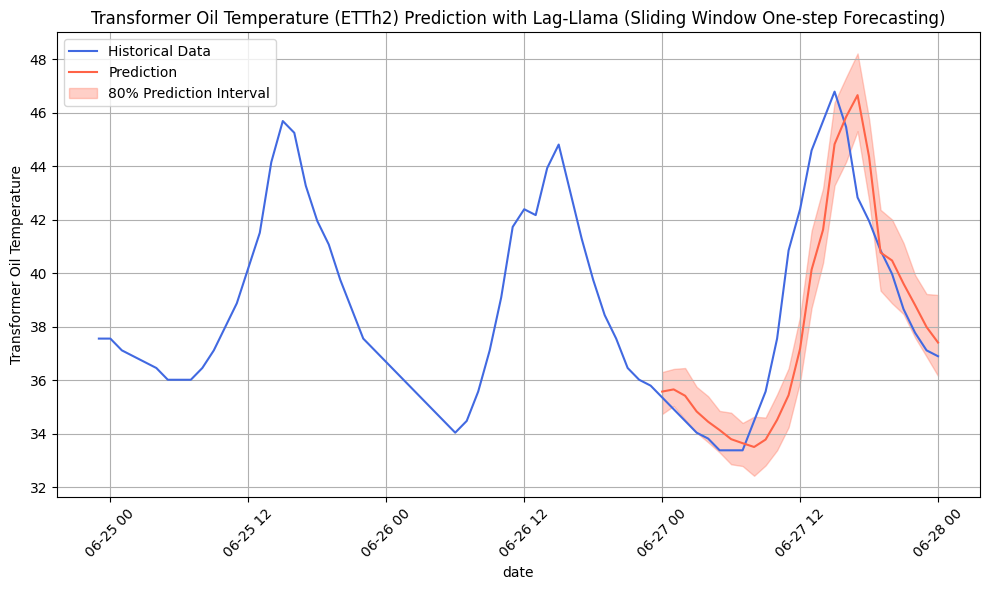

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from gluonts.dataset.common import ListDataset
from gluonts.evaluation import make_evaluation_predictions
from lag_llama.gluon.estimator import LagLlamaEstimator

from utils_snp.metrics import calculate_metrics

# $32$, $64$, $128$, $256$, $512$, $1024$
# 480, 1120, 1152, 1536, 1664， 1600
CONTEXT_WINDOW = 478
FORECAST_STEPS = 25 # Number of one-step forecasts to make

def get_lag_llama_predictions(dataset, prediction_length, context_length=32, use_rope_scaling=False, num_samples=100):
    ckpt = torch.load("weights/lag-llama.ckpt", map_location=torch.device("mps" if torch.mps.is_available() else "cpu"))
    estimator_args = ckpt["hyper_parameters"]["model_kwargs"]
    
    rope_scaling_arguments = {
        "type": "linear",
        "factor": max(1.0, (context_length + prediction_length) / estimator_args["context_length"]),
    }
    
    estimator = LagLlamaEstimator(
        ckpt_path="weights/lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length,
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        scaling=estimator_args["scaling"],
        time_feat=estimator_args["time_feat"],
        rope_scaling=rope_scaling_arguments if use_rope_scaling else None,
        device=torch.device("mps" if torch.mps.is_available() else "cpu")
    )
    
    lightning_module = estimator.create_lightning_module()
    transformation = estimator.create_transformation()
    predictor = estimator.create_predictor(transformation, lightning_module)
    
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset,
        predictor=predictor,
        num_samples=num_samples
    )
    forecasts = list(forecast_it)
    tss = list(ts_it)
    
    return forecasts, tss

def generate_single_forecast(context_data, start_date):
    """Generate a single one-step forecast"""
    # Ensure context_data is 1D
    context_data = np.asarray(context_data).flatten()
    
    # Create ListDataset for the current context window
    dataset = ListDataset(
        [{"start": start_date, "target": context_data}],
        freq="1h"
    )
    
    # Generate forecast
    forecasts, _ = get_lag_llama_predictions(
        dataset=dataset,
        prediction_length=1,  # One-step forecast
        context_length=CONTEXT_WINDOW,
        use_rope_scaling=True,
        num_samples=100
    )
    
    forecast_samples = forecasts[0].samples
    
    # Extract quantilesss
    low, median, high = np.percentile(forecast_samples, [10, 50, 90], axis=0)
    return low[0], median[0], high[0]  # Return single values instead of arrays

def generate_sliding_window_forecasts(data, start_idx):
    """Generate forecasts using sliding window approach with corrected date alignment"""
    print(f"\nForecast Setup Details:")
    print(f"Total data length: {len(data)}")
    print(f"Start index (last point in context window): {start_idx}")
    print(f"Context window size: {CONTEXT_WINDOW}")
    
    all_forecasts = {
        'median': [],
        'low': [],
        'high': [],
        'dates': []
    }
    
    for i in range(FORECAST_STEPS):
        current_idx = start_idx + i
        context_start = current_idx - CONTEXT_WINDOW
        context_end = current_idx

        print(f"\nStep {i+1} / {FORECAST_STEPS}")
        print(f"  Context indices = [{context_start}, {context_end}]")
        print(f"  Forecast index  = {current_idx}")
        print(f"  Context date range = {data['date'].iloc[context_start]} "
              f"to {data['date'].iloc[context_end]}")
        print(f"  Forecast date       = {data['date'].iloc[current_idx + 1]}")  # Note the +1 here

        context_data = data['OT'].iloc[context_start + 1: context_end + 1].to_numpy()
        print(len(context_data))
        context_start_date = data['date'].iloc[context_start]
        print(context_start_date)
        low, median, high = generate_single_forecast(context_data, context_start_date)
        
        if current_idx + 1 < len(data):
            actual_val = data['OT'].iloc[current_idx + 1]
            print(f"  Forecast median = {median:.2f}, Actual = {actual_val:.2f}")
        
        all_forecasts['median'].append(median)
        all_forecasts['low'].append(low)
        all_forecasts['high'].append(high)
        all_forecasts['dates'].append(data['date'].iloc[current_idx + 1])  # Store the next timestamp
    
    return all_forecasts

def plot_forecast_with_sliding_window(data, start_idx, forecasts):
    """Modified plotting function for sliding window forecasts with corrected alignment"""
    plt.figure(figsize=(10, 6))
    
    # Plot historical context (last window before forecasts begin)
    # Note: Now ends at start_idx (exclusive) to avoid overlap
    context_data = data.iloc[start_idx - 48:start_idx + FORECAST_STEPS + 1]
    plt.plot(
        context_data['date'],
        context_data['OT'],
        color='royalblue',
        label='Historical Data'
    )
    
    # Plot forecasts
    forecast_dates = forecasts['dates']
    plt.plot(
        forecast_dates,
        forecasts['median'],
        color='tomato',
        label='Prediction'
    )
    plt.fill_between(
        forecast_dates,
        forecasts['low'],
        forecasts['high'],
        color='tomato',
        alpha=0.3,
        label='80% Prediction Interval'
    )
    
    plt.xlabel('date')
    plt.ylabel('Transformer Oil Temperature')
    plt.title('Transformer Oil Temperature (ETTh2) Prediction with Lag-Llama (Sliding Window One-step Forecasting)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def calculate_sliding_window_metrics(actual_values, predicted_values):
    """Calculate metrics for sliding window predictions"""
    metrics = calculate_metrics(
        actual_values,
        predicted_values,
        insample=None
    )
    return metrics

etth2 = df_etth2.reset_index()[["date", "OT"]]
etth2["date"] = pd.to_datetime(etth2["date"])

target_date = pd.Timestamp('2017-06-27 00:00:00')
# target_date = pd.Timestamp('2017-06-29 00:00:00')
# target_date = pd.Timestamp('2017-07-04 00:00:00')
start_idx = etth2[etth2['date'] < target_date].index[-1]
print(f"Start index: {start_idx}")
# Generate forecasts using sliding window
forecasts = generate_sliding_window_forecasts(etth2, start_idx)

actual_values = etth2['OT'].iloc[start_idx:start_idx + FORECAST_STEPS + 1].values
metrics = calculate_sliding_window_metrics(actual_values, forecasts['median'])

print("\nSliding Window Forecast Metrics:")
for metric_name, value in metrics.items():
    if value is not None:
        print(f"{metric_name}: {value:.4f}")
    else:
        print(f"{metric_name}: N/A")

plot_forecast_with_sliding_window(etth2, start_idx, forecasts)

# ETT-H2 Diagram 2

Start index: 8711

Forecast Setup Details:
Total data length: 17420
Start index (last point in context window): 8711
Context window size: 480

Step 1 / 25
  Context indices = [8231, 8711]
  Forecast index  = 8711
  Context date range = 2017-06-08 23:00:00 to 2017-06-28 23:00:00
  Forecast date       = 2017-06-29 00:00:00
480
2017-06-08 23:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 36.77, Actual = 36.47

Step 2 / 25
  Context indices = [8232, 8712]
  Forecast index  = 8712
  Context date range = 2017-06-09 00:00:00 to 2017-06-29 00:00:00
  Forecast date       = 2017-06-29 01:00:00
480
2017-06-09 00:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 36.62, Actual = 35.81

Step 3 / 25
  Context indices = [8233, 8713]
  Forecast index  = 8713
  Context date range = 2017-06-09 01:00:00 to 2017-06-29 01:00:00
  Forecast date       = 2017-06-29 02:00:00
480
2017-06-09 01:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 36.39, Actual = 35.37

Step 4 / 25
  Context indices = [8234, 8714]
  Forecast index  = 8714
  Context date range = 2017-06-09 02:00:00 to 2017-06-29 02:00:00
  Forecast date       = 2017-06-29 03:00:00
480
2017-06-09 02:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 35.56, Actual = 34.93

Step 5 / 25
  Context indices = [8235, 8715]
  Forecast index  = 8715
  Context date range = 2017-06-09 03:00:00 to 2017-06-29 03:00:00
  Forecast date       = 2017-06-29 04:00:00
480
2017-06-09 03:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 35.27, Actual = 34.71

Step 6 / 25
  Context indices = [8236, 8716]
  Forecast index  = 8716
  Context date range = 2017-06-09 04:00:00 to 2017-06-29 04:00:00
  Forecast date       = 2017-06-29 05:00:00
480
2017-06-09 04:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 34.89, Actual = 34.49

Step 7 / 25
  Context indices = [8237, 8717]
  Forecast index  = 8717
  Context date range = 2017-06-09 05:00:00 to 2017-06-29 05:00:00
  Forecast date       = 2017-06-29 06:00:00
480
2017-06-09 05:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 34.86, Actual = 34.05

Step 8 / 25
  Context indices = [8238, 8718]
  Forecast index  = 8718
  Context date range = 2017-06-09 06:00:00 to 2017-06-29 06:00:00
  Forecast date       = 2017-06-29 07:00:00
480
2017-06-09 06:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 34.65, Actual = 34.05

Step 9 / 25
  Context indices = [8239, 8719]
  Forecast index  = 8719
  Context date range = 2017-06-09 07:00:00 to 2017-06-29 07:00:00
  Forecast date       = 2017-06-29 08:00:00
480
2017-06-09 07:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 34.28, Actual = 35.15

Step 10 / 25
  Context indices = [8240, 8720]
  Forecast index  = 8720
  Context date range = 2017-06-09 08:00:00 to 2017-06-29 08:00:00
  Forecast date       = 2017-06-29 09:00:00
480
2017-06-09 08:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 34.43, Actual = 37.12

Step 11 / 25
  Context indices = [8241, 8721]
  Forecast index  = 8721
  Context date range = 2017-06-09 09:00:00 to 2017-06-29 09:00:00
  Forecast date       = 2017-06-29 10:00:00
480
2017-06-09 09:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 34.89, Actual = 39.32

Step 12 / 25
  Context indices = [8242, 8722]
  Forecast index  = 8722
  Context date range = 2017-06-09 10:00:00 to 2017-06-29 10:00:00
  Forecast date       = 2017-06-29 11:00:00
480
2017-06-09 10:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 36.59, Actual = 41.52

Step 13 / 25
  Context indices = [8243, 8723]
  Forecast index  = 8723
  Context date range = 2017-06-09 11:00:00 to 2017-06-29 11:00:00
  Forecast date       = 2017-06-29 12:00:00
480
2017-06-09 11:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 38.20, Actual = 43.50

Step 14 / 25
  Context indices = [8244, 8724]
  Forecast index  = 8724
  Context date range = 2017-06-09 12:00:00 to 2017-06-29 12:00:00
  Forecast date       = 2017-06-29 13:00:00
480
2017-06-09 12:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 40.27, Actual = 44.60

Step 15 / 25
  Context indices = [8245, 8725]
  Forecast index  = 8725
  Context date range = 2017-06-09 13:00:00 to 2017-06-29 13:00:00
  Forecast date       = 2017-06-29 14:00:00
480
2017-06-09 13:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 42.83, Actual = 46.35

Step 16 / 25
  Context indices = [8246, 8726]
  Forecast index  = 8726
  Context date range = 2017-06-09 14:00:00 to 2017-06-29 14:00:00
  Forecast date       = 2017-06-29 15:00:00
480
2017-06-09 14:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 43.91, Actual = 46.35

Step 17 / 25
  Context indices = [8247, 8727]
  Forecast index  = 8727
  Context date range = 2017-06-09 15:00:00 to 2017-06-29 15:00:00
  Forecast date       = 2017-06-29 16:00:00
480
2017-06-09 15:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 46.12, Actual = 45.03

Step 18 / 25
  Context indices = [8248, 8728]
  Forecast index  = 8728
  Context date range = 2017-06-09 16:00:00 to 2017-06-29 16:00:00
  Forecast date       = 2017-06-29 17:00:00
480
2017-06-09 16:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 45.28, Actual = 43.94

Step 19 / 25
  Context indices = [8249, 8729]
  Forecast index  = 8729
  Context date range = 2017-06-09 17:00:00 to 2017-06-29 17:00:00
  Forecast date       = 2017-06-29 18:00:00
480
2017-06-09 17:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 43.04, Actual = 42.40

Step 20 / 25
  Context indices = [8250, 8730]
  Forecast index  = 8730
  Context date range = 2017-06-09 18:00:00 to 2017-06-29 18:00:00
  Forecast date       = 2017-06-29 19:00:00
480
2017-06-09 18:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 41.81, Actual = 41.30

Step 21 / 25
  Context indices = [8251, 8731]
  Forecast index  = 8731
  Context date range = 2017-06-09 19:00:00 to 2017-06-29 19:00:00
  Forecast date       = 2017-06-29 20:00:00
480
2017-06-09 19:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 40.00, Actual = 40.20

Step 22 / 25
  Context indices = [8252, 8732]
  Forecast index  = 8732
  Context date range = 2017-06-09 20:00:00 to 2017-06-29 20:00:00
  Forecast date       = 2017-06-29 21:00:00
480
2017-06-09 20:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 39.51, Actual = 39.32

Step 23 / 25
  Context indices = [8253, 8733]
  Forecast index  = 8733
  Context date range = 2017-06-09 21:00:00 to 2017-06-29 21:00:00
  Forecast date       = 2017-06-29 22:00:00
480
2017-06-09 21:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 38.59, Actual = 38.66

Step 24 / 25
  Context indices = [8254, 8734]
  Forecast index  = 8734
  Context date range = 2017-06-09 22:00:00 to 2017-06-29 22:00:00
  Forecast date       = 2017-06-29 23:00:00
480
2017-06-09 22:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 37.98, Actual = 38.44

Step 25 / 25
  Context indices = [8255, 8735]
  Forecast index  = 8735
  Context date range = 2017-06-09 23:00:00 to 2017-06-29 23:00:00
  Forecast date       = 2017-06-30 00:00:00
480
2017-06-09 23:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 37.69, Actual = 38.00

Sliding Window Forecast Metrics:
MAE: 1.0146
MSE: 1.9842
RMSE: 1.4086
MAPE: 2.5038
SMAPE: 2.5599
MASE: N/A


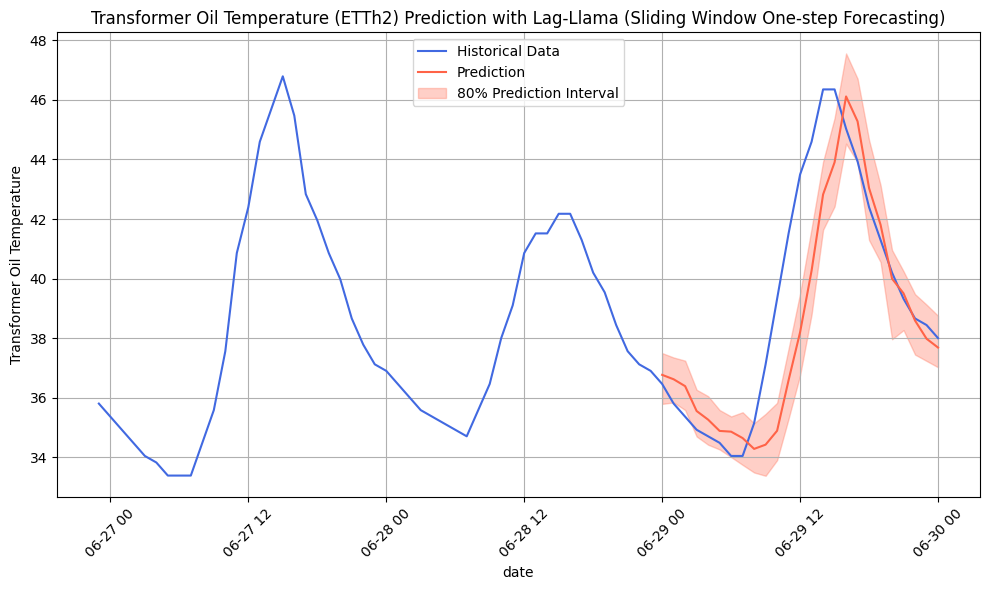

In [258]:
CONTEXT_WINDOW = 480
FORECAST_STEPS = 25 

# target_date = pd.Timestamp('2017-06-27 00:00:00')
target_date = pd.Timestamp('2017-06-29 00:00:00')
# target_date = pd.Timestamp('2017-07-04 00:00:00')
start_idx = etth2[etth2['date'] < target_date].index[-1]
print(f"Start index: {start_idx}")
# Generate forecasts using sliding window
forecasts = generate_sliding_window_forecasts(etth2, start_idx)

actual_values = etth2['OT'].iloc[start_idx:start_idx + FORECAST_STEPS].values
metrics = calculate_sliding_window_metrics(actual_values, forecasts['median'])

print("\nSliding Window Forecast Metrics:")
for metric_name, value in metrics.items():
    if value is not None:
        print(f"{metric_name}: {value:.4f}")
    else:
        print(f"{metric_name}: N/A")

plot_forecast_with_sliding_window(etth2, start_idx, forecasts)

# ETT-H2 Diagram 2

Start index: 8831

Forecast Setup Details:
Total data length: 17420
Start index (last point in context window): 8831
Context window size: 1120

Step 1 / 25
  Context indices = [7711, 8831]
  Forecast index  = 8831
  Context date range = 2017-05-18 07:00:00 to 2017-07-03 23:00:00
  Forecast date       = 2017-07-04 00:00:00
1120
2017-05-18 07:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 37.91, Actual = 36.24

Step 2 / 25
  Context indices = [7712, 8832]
  Forecast index  = 8832
  Context date range = 2017-05-18 08:00:00 to 2017-07-04 00:00:00
  Forecast date       = 2017-07-04 01:00:00
1120
2017-05-18 08:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 37.41, Actual = 36.03

Step 3 / 25
  Context indices = [7713, 8833]
  Forecast index  = 8833
  Context date range = 2017-05-18 09:00:00 to 2017-07-04 01:00:00
  Forecast date       = 2017-07-04 02:00:00
1120
2017-05-18 09:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 36.26, Actual = 35.81

Step 4 / 25
  Context indices = [7714, 8834]
  Forecast index  = 8834
  Context date range = 2017-05-18 10:00:00 to 2017-07-04 02:00:00
  Forecast date       = 2017-07-04 03:00:00
1120
2017-05-18 10:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 36.23, Actual = 35.59

Step 5 / 25
  Context indices = [7715, 8835]
  Forecast index  = 8835
  Context date range = 2017-05-18 11:00:00 to 2017-07-04 03:00:00
  Forecast date       = 2017-07-04 04:00:00
1120
2017-05-18 11:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 35.12, Actual = 35.37

Step 6 / 25
  Context indices = [7716, 8836]
  Forecast index  = 8836
  Context date range = 2017-05-18 12:00:00 to 2017-07-04 04:00:00
  Forecast date       = 2017-07-04 05:00:00
1120
2017-05-18 12:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 35.81, Actual = 35.37

Step 7 / 25
  Context indices = [7717, 8837]
  Forecast index  = 8837
  Context date range = 2017-05-18 13:00:00 to 2017-07-04 05:00:00
  Forecast date       = 2017-07-04 06:00:00
1120
2017-05-18 13:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 35.13, Actual = 35.37

Step 8 / 25
  Context indices = [7718, 8838]
  Forecast index  = 8838
  Context date range = 2017-05-18 14:00:00 to 2017-07-04 06:00:00
  Forecast date       = 2017-07-04 07:00:00
1120
2017-05-18 14:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 35.01, Actual = 35.59

Step 9 / 25
  Context indices = [7719, 8839]
  Forecast index  = 8839
  Context date range = 2017-05-18 15:00:00 to 2017-07-04 07:00:00
  Forecast date       = 2017-07-04 08:00:00
1120
2017-05-18 15:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 35.34, Actual = 37.56

Step 10 / 25
  Context indices = [7720, 8840]
  Forecast index  = 8840
  Context date range = 2017-05-18 16:00:00 to 2017-07-04 08:00:00
  Forecast date       = 2017-07-04 09:00:00
1120
2017-05-18 16:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 35.78, Actual = 39.32

Step 11 / 25
  Context indices = [7721, 8841]
  Forecast index  = 8841
  Context date range = 2017-05-18 17:00:00 to 2017-07-04 09:00:00
  Forecast date       = 2017-07-04 10:00:00
1120
2017-05-18 17:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 38.04, Actual = 40.20

Step 12 / 25
  Context indices = [7722, 8842]
  Forecast index  = 8842
  Context date range = 2017-05-18 18:00:00 to 2017-07-04 10:00:00
  Forecast date       = 2017-07-04 11:00:00
1120
2017-05-18 18:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 40.36, Actual = 42.40

Step 13 / 25
  Context indices = [7723, 8843]
  Forecast index  = 8843
  Context date range = 2017-05-18 19:00:00 to 2017-07-04 11:00:00
  Forecast date       = 2017-07-04 12:00:00
1120
2017-05-18 19:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 40.59, Actual = 43.94

Step 14 / 25
  Context indices = [7724, 8844]
  Forecast index  = 8844
  Context date range = 2017-05-18 20:00:00 to 2017-07-04 12:00:00
  Forecast date       = 2017-07-04 13:00:00
1120
2017-05-18 20:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 42.12, Actual = 46.13

Step 15 / 25
  Context indices = [7725, 8845]
  Forecast index  = 8845
  Context date range = 2017-05-18 21:00:00 to 2017-07-04 13:00:00
  Forecast date       = 2017-07-04 14:00:00
1120
2017-05-18 21:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 42.09, Actual = 47.45

Step 16 / 25
  Context indices = [7726, 8846]
  Forecast index  = 8846
  Context date range = 2017-05-18 22:00:00 to 2017-07-04 14:00:00
  Forecast date       = 2017-07-04 15:00:00
1120
2017-05-18 22:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 45.70, Actual = 48.99

Step 17 / 25
  Context indices = [7727, 8847]
  Forecast index  = 8847
  Context date range = 2017-05-18 23:00:00 to 2017-07-04 15:00:00
  Forecast date       = 2017-07-04 16:00:00
1120
2017-05-18 23:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 46.64, Actual = 47.67

Step 18 / 25
  Context indices = [7728, 8848]
  Forecast index  = 8848
  Context date range = 2017-05-19 00:00:00 to 2017-07-04 16:00:00
  Forecast date       = 2017-07-04 17:00:00
1120
2017-05-19 00:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 48.10, Actual = 45.25

Step 19 / 25
  Context indices = [7729, 8849]
  Forecast index  = 8849
  Context date range = 2017-05-19 01:00:00 to 2017-07-04 17:00:00
  Forecast date       = 2017-07-04 18:00:00
1120
2017-05-19 01:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 46.64, Actual = 44.16

Step 20 / 25
  Context indices = [7730, 8850]
  Forecast index  = 8850
  Context date range = 2017-05-19 02:00:00 to 2017-07-04 18:00:00
  Forecast date       = 2017-07-04 19:00:00
1120
2017-05-19 02:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 43.68, Actual = 43.28

Step 21 / 25
  Context indices = [7731, 8851]
  Forecast index  = 8851
  Context date range = 2017-05-19 03:00:00 to 2017-07-04 19:00:00
  Forecast date       = 2017-07-04 20:00:00
1120
2017-05-19 03:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 42.17, Actual = 41.96

Step 22 / 25
  Context indices = [7732, 8852]
  Forecast index  = 8852
  Context date range = 2017-05-19 04:00:00 to 2017-07-04 20:00:00
  Forecast date       = 2017-07-04 21:00:00
1120
2017-05-19 04:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 41.73, Actual = 41.08

Step 23 / 25
  Context indices = [7733, 8853]
  Forecast index  = 8853
  Context date range = 2017-05-19 05:00:00 to 2017-07-04 21:00:00
  Forecast date       = 2017-07-04 22:00:00
1120
2017-05-19 05:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 41.38, Actual = 40.20

Step 24 / 25
  Context indices = [7734, 8854]
  Forecast index  = 8854
  Context date range = 2017-05-19 06:00:00 to 2017-07-04 22:00:00
  Forecast date       = 2017-07-04 23:00:00
1120
2017-05-19 06:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 40.29, Actual = 39.76

Step 25 / 25
  Context indices = [7735, 8855]
  Forecast index  = 8855
  Context date range = 2017-05-19 07:00:00 to 2017-07-04 23:00:00
  Forecast date       = 2017-07-05 00:00:00
1120
2017-05-19 07:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/3702767029.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("weights/lag-llama.ckpt", m

  Forecast median = 40.18, Actual = 39.32

Sliding Window Forecast Metrics:
MAE: 0.9686
MSE: 1.7590
RMSE: 1.3263
MAPE: 2.2996
SMAPE: 2.3322
MASE: N/A


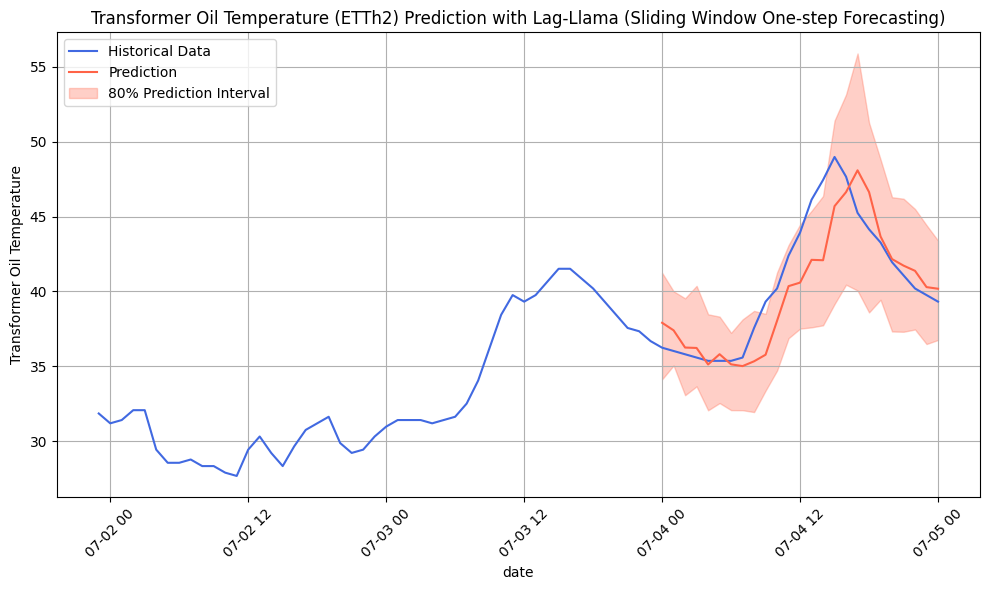

In [259]:
CONTEXT_WINDOW = 1120
FORECAST_STEPS = 25 

# target_date = pd.Timestamp('2017-06-27 00:00:00')
# target_date = pd.Timestamp('2017-06-29 00:00:00')
target_date = pd.Timestamp('2017-07-04 00:00:00')
start_idx = etth2[etth2['date'] < target_date].index[-1]
print(f"Start index: {start_idx}")
# Generate forecasts using sliding window
forecasts = generate_sliding_window_forecasts(etth2, start_idx)

actual_values = etth2['OT'].iloc[start_idx:start_idx + FORECAST_STEPS].values
metrics = calculate_sliding_window_metrics(actual_values, forecasts['median'])

print("\nSliding Window Forecast Metrics:")
for metric_name, value in metrics.items():
    if value is not None:
        print(f"{metric_name}: {value:.4f}")
    else:
        print(f"{metric_name}: N/A")

plot_forecast_with_sliding_window(etth2, start_idx, forecasts)